In [1]:
import numpy as np

In [2]:
import chardet
with open('tripadvisor_hotel_reviews.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'windows-1251',
 'confidence': 0.97174608618353,
 'language': 'Russian'}

In [3]:
import pandas as pd
df = pd.read_csv('tripadvisor_hotel_reviews.csv', encoding='windows-1251')
df.head

<bound method NDFrame.head of     selection1_name,"selection1_selection2_name","selection1_selection2_selection3","selection1_selection2_selection3_url"
0    Глэмпинг Доброе,"Плюсы: Очень красивая заповед...                                                                    
1    Глэмпинг Доброе,"Ездили в глэмпинг Доброе комп...                                                                    
2    Глэмпинг Доброе,"Из плюсов: красивая заповедна...                                                                    
3    Глэмпинг Доброе,"Красиво, дикая природа с идеа...                                                                    
4    Глэмпинг Доброе,"Все отлично, но с газом надо ...                                                                    
..                                                 ...                                                                    
100  Eko-camping SFERA,"Сама по себе идея вообще ог...                                                       

In [4]:
df.rename(columns = {'selection1_name,"selection1_selection2_name","selection1_selection2_selection3","selection1_selection2_selection3_url"': 'reviews'}, inplace = True)
df

,reviews
0,"Глэмпинг Доброе,""Плюсы: Очень красивая заповед..."
1,"Глэмпинг Доброе,""Ездили в глэмпинг Доброе комп..."
2,"Глэмпинг Доброе,""Из плюсов: красивая заповедна..."
3,"Глэмпинг Доброе,""Красиво, дикая природа с идеа..."
4,"Глэмпинг Доброе,""Все отлично, но с газом надо ..."
...,...
100,"Eko-camping SFERA,""Сама по себе идея вообще ог..."
101,"Eko-camping SFERA,""При заселении проводили нас..."
102,"Eko-camping SFERA,""эко кемпинг SFERA - купол п..."
103,"СПА ЛЕС глэмпинг,"""","""","""""


In [5]:
places = []
reviews = []

for element in range(df.size):
    place = df['reviews'][element].split('"')[0]
    review = df['reviews'][element].split('"')[1]
    places.append(place)
    reviews.append(review)
    
df = pd.DataFrame({'places': places, 'reviews':reviews})
df

,places,reviews
0,"Глэмпинг Доброе,","Плюсы: Очень красивая заповедная зона, просыпа..."
1,"Глэмпинг Доброе,",Ездили в глэмпинг Доброе компанией в конце апр...
2,"Глэмпинг Доброе,","Из плюсов: красивая заповедная зона, потрясающ..."
3,"Глэмпинг Доброе,","Красиво, дикая природа с идеальным комфортом, ..."
4,"Глэмпинг Доброе,","Все отлично, но с газом надо что то делать. Мо..."
...,...,...
100,"Eko-camping SFERA,",Сама по себе идея вообще огонь (если говорить ...
101,"Eko-camping SFERA,",При заселении проводили нас в наш геокупол #1 ...
102,"Eko-camping SFERA,",эко кемпинг SFERA - купол плюсы - красивая при...
103,"СПА ЛЕС глэмпинг,",


In [53]:
df1 = df.copy()
places1 = []
data = {}

for row in range(len(df1.index)):
    if df1.iat[row, 0] not in places1:
        places1.append(df1.iat[row, 0])
        df2 = df1[df1['places'] == df1.iat[row, 0]]
#         print(df2)
        tem = []
        for i in range(len(df2.index)):
            tem.append(df2.iat[i, 1].lower())
        data[df1.iat[row, 0]] = tem

reviews1 = []*len(places1)

for i in range(len(places1)):
    reviews1.append(data[places1[i]])
    reviews1[i] = ' '.join(reviews1[i])

In [54]:
new = pd.DataFrame({'places': places1, 'collected_reviews': reviews1})
new

,places,collected_reviews
0,"Глэмпинг Доброе,","плюсы: очень красивая заповедная зона, просыпа..."
1,"Глэмпинг на озере Сиг,",отдыхала одна с двумя детьми. очень повезло с ...
2,"Глэмпинг Видно Озеро,",забронировал проживание в глэмпинге случайно ...
3,"Глэмпинг Vezzika,",плюсы: - хорошее и красивое местоположение мин...
4,"ЛЕС Глэмпинг и спа,","решили мы посетить это чудесное место , заброн..."
5,"Глэмпинг NewCamp,","глэмпинг находится близ посёлка эссойла, в сос..."
6,"Urman Camp Глэмпинг,",приехали в глэмпинг к 5 попросили заранее зато...
7,"Велна Эко Спа Резорт,","мне есть с чем сравнивать, поэтому посетив заг..."
8,"Глэмпинг Под небом,","отличные условия проживания, очень отзывчивый ..."
9,"Гуляй-Город,",приехали сегодня после дороги и музея в серпух...


In [64]:
sum = 0
for k in range(30):
    sum += len(new.iat[k,1])
print(sum/30)

1863.7666666666667


## Cleaning data

In [8]:
!pip install nltk

In [42]:
!pip install wordcloud

In [47]:
import nltk
import re
import string

from nltk.corpus import stopwords
stop = stopwords.words('russian')
stop.remove('хорошо')
stop.append('это')
stop.append('очень')
stop.append('место')

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def preprocessing(review):
    
    # data cleaning
    review = review.lower()
    review = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',review)
    review = re.sub('@[^\s]+','', review)
    review = re.sub(r'#([^\s]+)', r'\1', review)
    review = re.sub('[\s]+', ' ', review)
    review = re.sub(r'\W*\b\w{1,3}\b', '', review)
    token = nltk.word_tokenize(review)
    review = [word for word in token if (word not in stop and word not in string.punctuation and word != "' '" and word != "``" and word != "''") ]
    review = [lemmatizer.lemmatize(word) for word in review]
    review = ' '.join(review)
    
    return review 

In [55]:
from nltk.tokenize import word_tokenize

new['collected_reviews'] = new['collected_reviews'].apply(lambda review: preprocessing(review))

In [56]:
new

,places,collected_reviews
0,"Глэмпинг Доброе,",плюсы красивая заповедная зона просыпаешься ви...
1,"Глэмпинг на озере Сиг,",отдыхала одна двумя детьми повезло погодой сос...
2,"Глэмпинг Видно Озеро,",забронировал проживание глэмпинге случайно ока...
3,"Глэмпинг Vezzika,",плюсы хорошее красивое местоположение минусы и...
4,"ЛЕС Глэмпинг и спа,",решили посетить чудесное забронировали значит ...
5,"Глэмпинг NewCamp,",глэмпинг находится близ посёлка эссойла соснов...
6,"Urman Camp Глэмпинг,",приехали глэмпинг попросили заранее затопить и...
7,"Велна Эко Спа Резорт,",сравнивать поэтому посетив загородный-отель « ...
8,"Глэмпинг Под небом,",отличные условия проживания отзывчивый позитив...
9,"Гуляй-Город,",приехали сегодня дороги музея серпухове доброж...


## Dostoevsky

In [69]:
!pip install dostoevsky

In [12]:
from dostoevsky.tokenization import RegexTokenizer
from dostoevsky.models import FastTextSocialNetworkModel

In [13]:
tokenizer = RegexTokenizer()
model = FastTextSocialNetworkModel(tokenizer=tokenizer)

In [57]:
reviews2 = reviews1
result = model.predict(reviews2, k=2)

sentiment_list=[]

for sentiment in result:
    sentiment_list.append(sentiment)

    
neutral_list = []
negative_list = []
positive_list = []
    
for sentiment in sentiment_list:
    neutral = sentiment.get('neutral')
    negative = sentiment.get('negative')
    positive = sentiment.get('positive')
    if neutral is None:
        neutral_list.append(0)
    else:
        neutral_list.append(sentiment.get('neutral'))
    if negative is None:
        negative_list.append(0)
    else:
        negative_list.append(sentiment.get('negative'))
    if positive is None:
        positive_list.append(0)
    else:
        positive_list.append(sentiment.get('positive'))

new['positive'] = positive_list
new['negative'] = negative_list
new['neutral'] = neutral_list
new


,places,collected_reviews,positive,negative,neutral
0,"Глэмпинг Доброе,",плюсы красивая заповедная зона просыпаешься ви...,0.256842,0.228166,0.000000
1,"Глэмпинг на озере Сиг,",отдыхала одна двумя детьми повезло погодой сос...,0.000000,0.262852,0.320831
2,"Глэмпинг Видно Озеро,",забронировал проживание глэмпинге случайно ока...,0.000000,0.000000,0.554480
3,"Глэмпинг Vezzika,",плюсы хорошее красивое местоположение минусы и...,0.000000,0.239359,0.320831
4,"ЛЕС Глэмпинг и спа,",решили посетить чудесное забронировали значит ...,0.000000,0.196836,0.507822
5,"Глэмпинг NewCamp,",глэмпинг находится близ посёлка эссойла соснов...,0.000000,0.196836,0.445540
6,"Urman Camp Глэмпинг,",приехали глэмпинг попросили заранее затопить и...,0.268951,0.182436,0.000000
7,"Велна Эко Спа Резорт,",сравнивать поэтому посетив загородный-отель « ...,0.320831,0.228166,0.000000
8,"Глэмпинг Под небом,",отличные условия проживания отзывчивый позитив...,0.212079,0.000000,0.281416
9,"Гуляй-Город,",приехали сегодня дороги музея серпухове доброж...,0.300756,0.000000,0.256842


### Let's devote 1 for reviews, that are more positive than negative or neutral, 0 otherwise (negative and neutral)

In [58]:
overall = []
for i in range(30):
    mx = max(positive_list[i], negative_list[i], neutral_list[i])
    if mx == positive_list[i]:
        m = 1
    else:
        m = 0
    overall.append(m)

In [59]:
new['mood'] = overall
new

,places,collected_reviews,positive,negative,neutral,mood
0,"Глэмпинг Доброе,",плюсы красивая заповедная зона просыпаешься ви...,0.256842,0.228166,0.000000,1
1,"Глэмпинг на озере Сиг,",отдыхала одна двумя детьми повезло погодой сос...,0.000000,0.262852,0.320831,0
2,"Глэмпинг Видно Озеро,",забронировал проживание глэмпинге случайно ока...,0.000000,0.000000,0.554480,0
3,"Глэмпинг Vezzika,",плюсы хорошее красивое местоположение минусы и...,0.000000,0.239359,0.320831,0
4,"ЛЕС Глэмпинг и спа,",решили посетить чудесное забронировали значит ...,0.000000,0.196836,0.507822,0
5,"Глэмпинг NewCamp,",глэмпинг находится близ посёлка эссойла соснов...,0.000000,0.196836,0.445540,0
6,"Urman Camp Глэмпинг,",приехали глэмпинг попросили заранее затопить и...,0.268951,0.182436,0.000000,1
7,"Велна Эко Спа Резорт,",сравнивать поэтому посетив загородный-отель « ...,0.320831,0.228166,0.000000,1
8,"Глэмпинг Под небом,",отличные условия проживания отзывчивый позитив...,0.212079,0.000000,0.281416,0
9,"Гуляй-Город,",приехали сегодня дороги музея серпухове доброж...,0.300756,0.000000,0.256842,1


## WordClouds

In [29]:
import matplotlib.pyplot as plt

### Positive wordcloud reviews based on colomn 'mood'

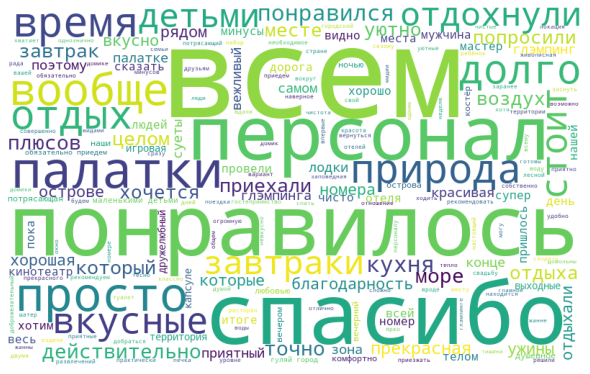

In [60]:
from wordcloud import WordCloud

words_list = new[new['mood']==1]['collected_reviews'].unique().tolist()
pos_words = " ".join(words_list)

pos_wordcloud = WordCloud(background_color = 'white', width=800, height = 500, stopwords = stop).generate(pos_words)

plt.figure(figsize=(8, 8), facecolor = None)
plt.imshow(pos_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### Positive wordcloud review

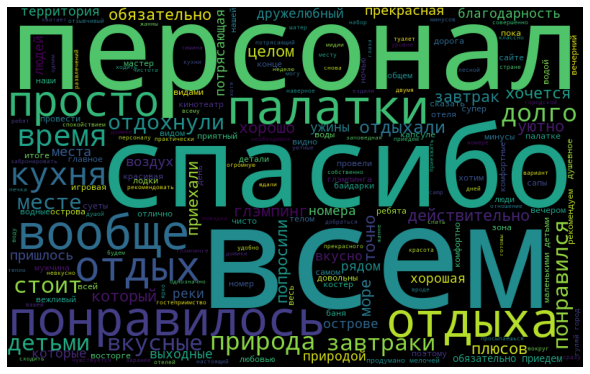

In [61]:
from wordcloud import WordCloud

words_list = new[new['positive']>0]['collected_reviews'].unique().tolist()
pos_words = " ".join(words_list)

pos_wordcloud = WordCloud(background_color = 'black', width=800, height = 500, stopwords = stop).generate(pos_words)

plt.figure(figsize=(8, 8), facecolor = None)
plt.imshow(pos_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### Neutral and negative wordcloud review

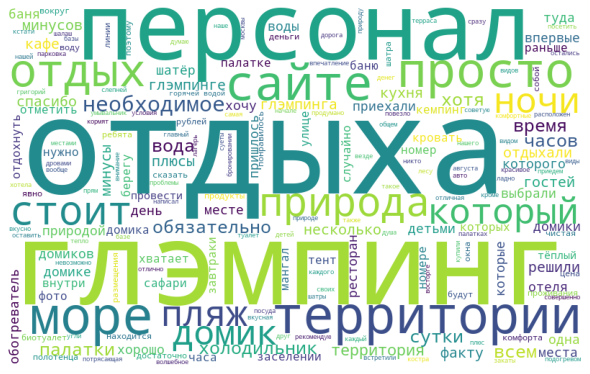

In [62]:
words_list = new[new['mood']==0]['collected_reviews'].unique().tolist()
pos_words = " ".join(words_list)

pos_wordcloud = WordCloud(background_color = 'white', width=800, height = 500, stopwords = stop).generate(pos_words)

plt.figure(figsize=(8, 8), facecolor = None)
plt.imshow(pos_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### Negative wordcloud review

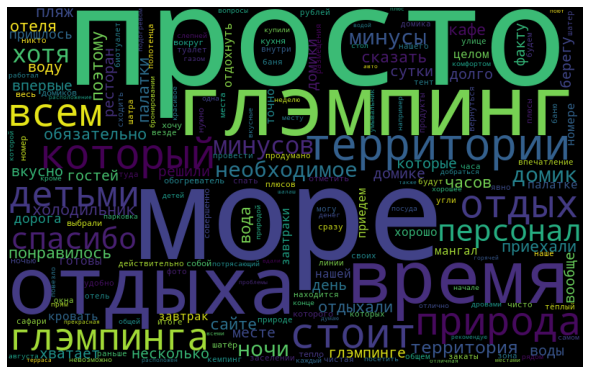

In [63]:
words_list = new[new['negative']>0]['collected_reviews'].unique().tolist()
neg_words = " ".join(words_list)

neg_wordcloud =  WordCloud(width=800, height = 500, stopwords = stop).generate(neg_words)

plt.figure(figsize=(8, 8), facecolor = None)
plt.imshow(neg_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### Neutral Wordcloud reviews

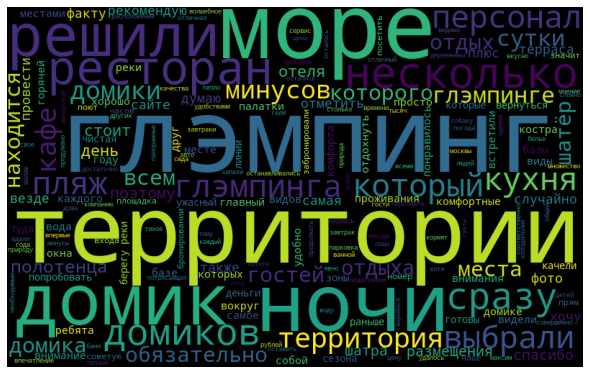

In [64]:
words_list = new[new['neutral']>0.35]['collected_reviews'].unique().tolist()
net_words = " ".join(words_list)

net_wordcloud =  WordCloud(width=800, height = 500, stopwords = stop).generate(net_words)

plt.figure(figsize=(8, 8), facecolor = None)
plt.imshow(net_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## Vectorizing text

### Divide the data on train and test groups

In [451]:
from sklearn.model_selection import train_test_split
data = new.copy()
y = data['mood'].values
data.drop(['mood'], axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, stratify=y)

print("Train data:",  X_train.shape, y_train.shape)
print("Test data:",  X_test.shape, y_test.shape)

Train data: (21, 5) (21,)
Test data: (9, 5) (9,)


### BOW

In [469]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(min_df=7)

X_train_review_bow = vect.fit_transform(X_train['collected_reviews'])
X_test_review_bow = vect.transform(X_test['collected_reviews'])

print('X_train_review_bow shape: ', X_train_review_bow.shape)
print('X_test_review_bow shape: ', X_test_review_bow.shape)

X_train_review_bow shape:  (21, 26)
X_test_review_bow shape:  (9, 26)


### TF-IDF

In [470]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=7)

X_train_review_tfidf = vectorizer.fit_transform(X_train['collected_reviews'])
X_test_review_tfidf = vectorizer.transform(X_test['collected_reviews'])

print('X_train_review_tfidf shape: ', X_train_review_tfidf.shape)
print('X_test_review_tfidf shape: ', X_test_review_tfidf.shape)

X_train_review_tfidf shape:  (21, 26)
X_test_review_tfidf shape:  (9, 26)


## Building models

### Naive Buyes model 

In [471]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

clf = MultinomialNB()
clf.fit(X_train_review_bow, y_train)

y_pred = clf.predict(X_test_review_bow) #prediction from model
print('Test Accuracy: ', accuracy_score(y_test, y_pred)) 

Test Accuracy:  0.6666666666666666


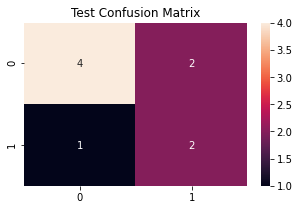

In [472]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

### Naive Buyes TF-IDF

In [473]:
clf = MultinomialNB(alpha=1)
clf.fit(X_train_review_tfidf, y_train)

y_pred = clf.predict(X_test_review_tfidf)
print('Test Accuracy: ', accuracy_score(y_test, y_pred))

Test Accuracy:  0.6666666666666666


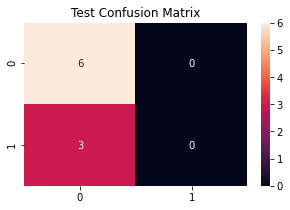

In [474]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

### Logistic regression TF-IDF

In [476]:
import warnings
warnings.filterwarnings('ignore')

In [478]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty='l2')
clf.fit(X_train_review_tfidf, y_train)

y_pred = clf.predict(X_test_review_tfidf)
print('Test Accuracy: ', accuracy_score(y_test, y_pred))

Test Accuracy:  0.7777777777777778


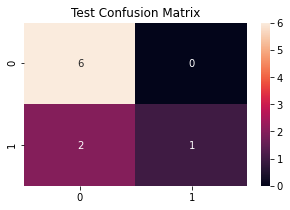

In [479]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

# Conclusion 

In [5]:
from prettytable import PrettyTable

x = PrettyTable()

x.field_names = ['Vectorizer', 'Model', 'Accuracy']
x.add_row(['BOW', 'Naive Bayes', '66.7%'])
x.add_row(['TFIDF', 'Naive Bayes', '66.7%'])
x.add_row(['TFIDF', 'Logistic Regression', '77.8%'])
print(x)

+------------+---------------------+----------+
| Vectorizer |        Model        | Accuracy |
+------------+---------------------+----------+
|    BOW     |     Naive Bayes     |  66.7%   |
|   TFIDF    |     Naive Bayes     |  66.7%   |
|   TFIDF    | Logistic Regression |  77.8%   |
+------------+---------------------+----------+
